In [37]:
# Code created by Xingchi Li (anthony.li@stat.tamu.edu)
# Adapted from code by Dr. Guha.
# Copyright reserved.

# We'll use Pandas for data manipulation, statsmodels for statistical models,
# matplotlib and seaborn for plotting, and SciPy for statistical functions.

# Step by step:
# 1. Reading Data & Basic Data Exploration:
# - Pandas will be used to read the data and explore its dimensions, head, etc.
# 2. Linear Model Fitting:
# - Statsmodels will be used for fitting a linear model and summarizing it.
# 3. Plotting:
# - Matplotlib and seaborn will be used for residual plots,
#   density plots, Q-Q plots, and scatter plots.
# 4. Inference and Prediction:
# - Statsmodels will again be used for confidence intervals and predictions.
# 5. Correlation Coefficient:
# - Pandas (.corr() method) and SciPy for the correlation test.
# 6. Linear Regression with Transformations:
# - Statsmodels for linear regression with transformations like 1/x and x^2.

# Reading Data & Basic Data Exploration

In [38]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Read data
data = pd.read_csv("Galton-Height-Data.txt", sep=" ")
print(data.dtypes)  # To check class of data
print(data.shape)  # Dimensions of data
print(data.head())  # First few rows

Father    float64
Son       float64
dtype: object
(1078, 2)
       Father       Son
NaN  65.04851  59.77827
NaN  63.25094  63.21404
NaN  64.95532  63.34242
NaN  65.75250  62.79238
NaN  61.13723  64.28113


# Linear Model Fitting

In [39]:
x = data['Father'].values
y = data['Son'].values
x = sm.add_constant(x)  # Adds a constant term for the intercept

lm_model = sm.OLS(y, x).fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.12e-69
Time:                        11:33:52   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8866      1.832     18.493      0.0

# Plotting

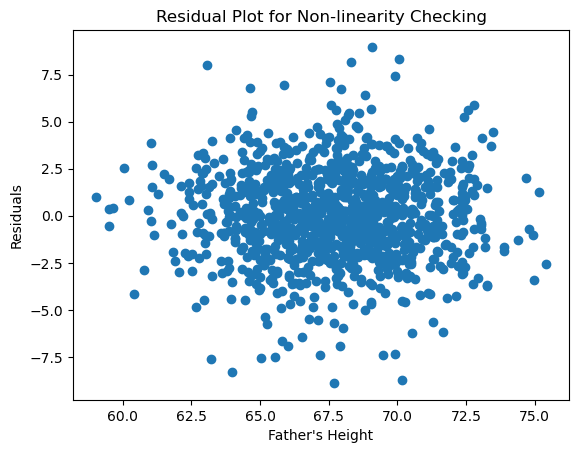

In [40]:
residuals = lm_model.resid
predictions = lm_model.predict()

# Residual vs. Father's Height
plt.scatter(data['Father'], residuals)
plt.xlabel("Father's Height")
plt.ylabel("Residuals")
plt.title("Residual Plot for Non-linearity Checking")
plt.show()

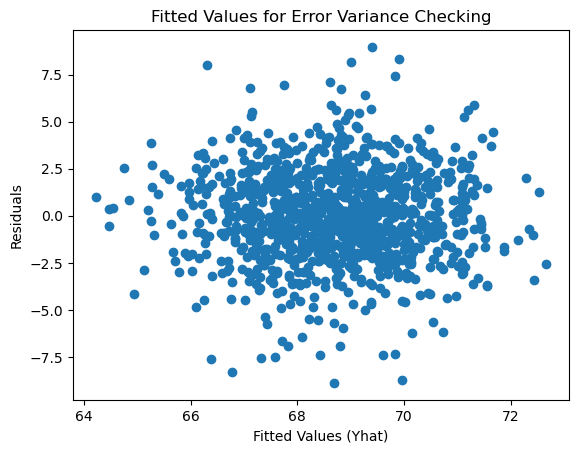

In [41]:
# Residual vs. Predicted Values
plt.scatter(predictions, residuals)
plt.xlabel("Fitted Values (Yhat)")
plt.ylabel("Residuals")
plt.title("Fitted Values for Error Variance Checking")
plt.show()

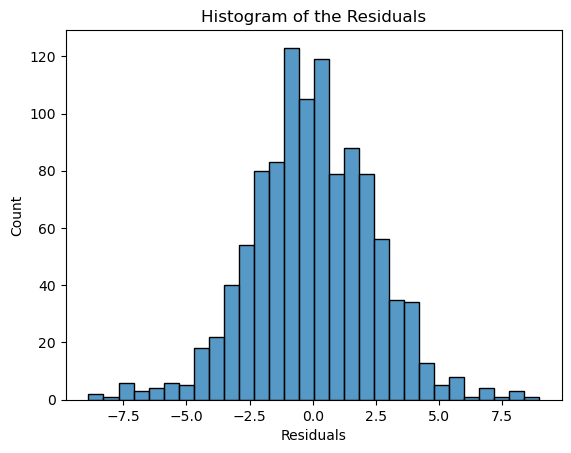

In [42]:
# Histogram of Residuals
sns.histplot(residuals, kde=False)
plt.xlabel("Residuals")
plt.title("Histogram of the Residuals")
plt.show()

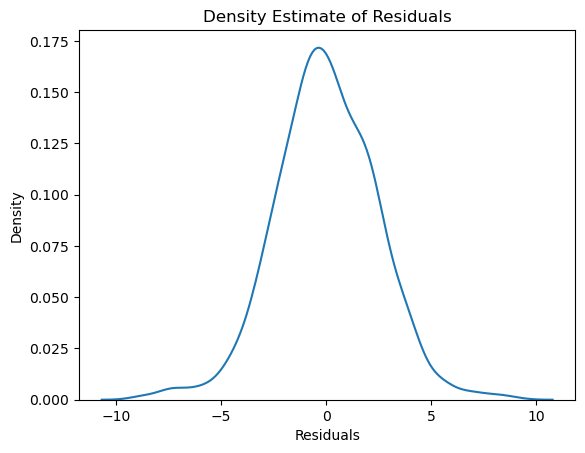

In [43]:
# Density Estimate of Residuals
sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Density Estimate of Residuals")
plt.show()

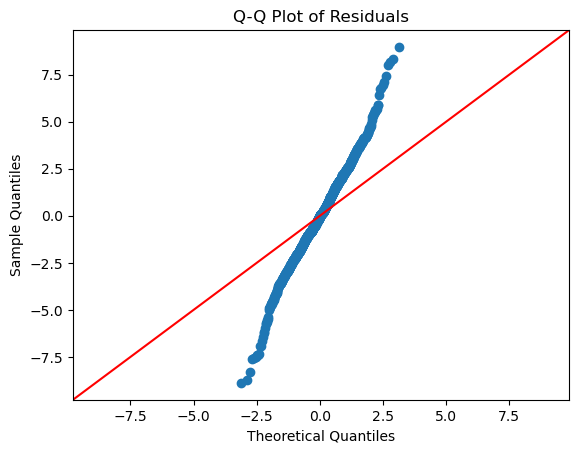

In [44]:
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

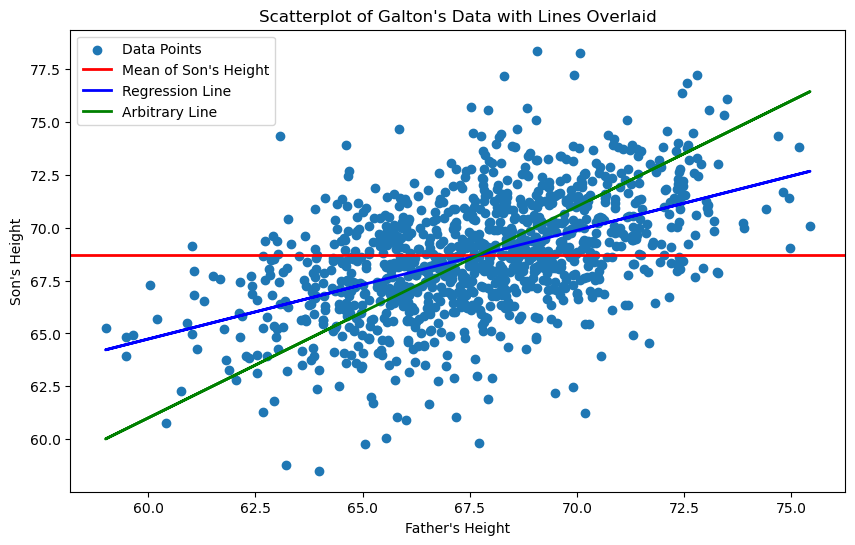

In [45]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data['Father'], data['Son'], label="Data Points")

# Mean line (red)
plt.axhline(y=np.mean(data['Son']), color='r', linestyle='-', linewidth=2, label="Mean of Son's Height")

# Regression line (blue)
plt.plot(data['Father'], predictions, color='b', linewidth=2, label="Regression Line")

# Arbitrary line (green) 
plt.plot(data['Father'], data['Father'] + 1, color='g', linestyle='-', linewidth=2, label="Arbitrary Line")

plt.xlabel("Father's Height")
plt.ylabel("Son's Height")
plt.title("Scatterplot of Galton's Data with Lines Overlaid")
plt.legend()
plt.show()

# Inference and Prediction

In [46]:
# Confidence intervals for the slope
print(lm_model.conf_int(alpha=0.05))  # 95% CI
print(lm_model.conf_int(alpha=0.10))  # 90% CI

# Prediction at X = 75
x_new = pd.DataFrame({'Intercept': [1], 'Father': [75]})
predictions = lm_model.get_prediction(x_new)
print(predictions.summary_frame(alpha=0.05))  # 95% CI for prediction

[[30.29121257 37.48199614]
 [ 0.46101879  0.56716729]]
[[30.8700534  36.90315531]
 [ 0.46956349  0.55862259]]
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  72.443582  0.211268      72.029039      72.858125     67.644704   

   obs_ci_upper  
0      77.24246  


# Correlation Coefficient and Test

In [47]:
# Correlation coefficient
print(data['Father'].corr(data['Son']))

# Correlation test
cor_test = stats.pearsonr(data['Father'], data['Son'])
print(f"Pearson correlation coefficient: {cor_test[0]}, P-value: {cor_test[1]}")

0.5013383111723433
Pearson correlation coefficient: 0.5013383111723431, P-value: 1.1212675496324029e-69


# Linear Regression with Transformations

In [48]:
# Regression with 1/x transformation
x_inv = 1 / data['Father'].values
x_inv = sm.add_constant(x_inv)
lm_model_inv = sm.OLS(y, x_inv).fit()
print(lm_model_inv.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     359.1
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.53e-69
Time:                        11:33:53   Log-Likelihood:                -2489.5
No. Observations:                1078   AIC:                             4983.
Df Residuals:                    1076   BIC:                             4993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.1197      1.819     56.697      0.0

In [49]:
# Regression with x^2 transformation
x_sq = data['Father'].values ** 2
x_sq = sm.add_constant(x_sq)
lm_model_sq = sm.OLS(y, x_sq).fit()
print(lm_model_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.1
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.17e-69
Time:                        11:33:53   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2343      0.921     55.614      0.0